<h2 style="font-size:32px;">EDA | Assignment
</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2 style="font-size:28px;">Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.</h2>

In [6]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [7]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


<h2 style="font-size:28px;">Question 2: Check for missing values in all columns and describe your approach for
handling them.
</h2>

In [8]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [10]:
#Handling Missing values
na_counts = df.isnull().sum().sort_values(ascending = False)
na_percent = (df.isnull().mean()*100).sort_values(ascending = False)
na_final = pd.concat([na_counts.rename("missing_counts") , na_percent.rename("missing %")] , axis = 1)
display(na_final)
print("\nBrief handling approach (as comments):")
print("- Numeric columns: impute with median if needed.")
print("- Categorical columns: impute with mode or 'Unknown'.")
print("- Drop columns with excessive missingness if low-utility.")

,missing_counts,missing %
ex_showroom_price,435,40.999057
selling_price,0,0.000000
name,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000



Brief handling approach (as comments):
- Numeric columns: impute with median if needed.
- Categorical columns: impute with mode or 'Unknown'.
- Drop columns with excessive missingness if low-utility.


<h2 style="font-size:28px;">Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.</h2>

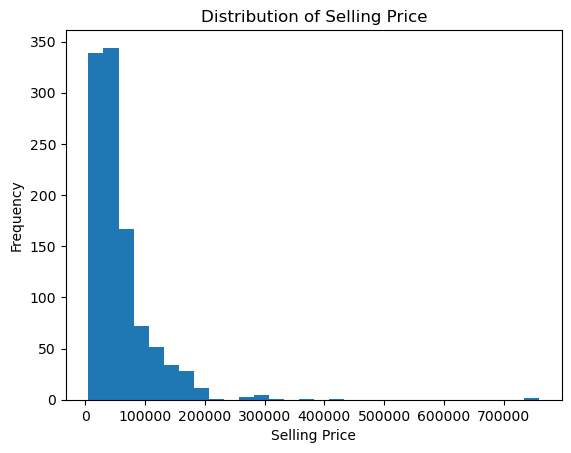

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
10%       20000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
90%      120000.000000
max      760000.000000
Name: selling_price_num, dtype: float64

In [16]:
df['selling_price_num'] = pd.to_numeric(df.get('selling_price') , errors = 'coerce')
plt.figure()
plt.hist(df['selling_price_num'].dropna(), bins=30)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()
display(df['selling_price_num'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))

In [17]:
#Most bikes are clustered in the lower price range.
#A few high-priced bikes stretch the tail to the right (long tail).

<h2 style="font-size:28px;">Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.</h2>

,avg_selling_price
seller_type,
Individual,59711.923223
Dealer,46666.666667


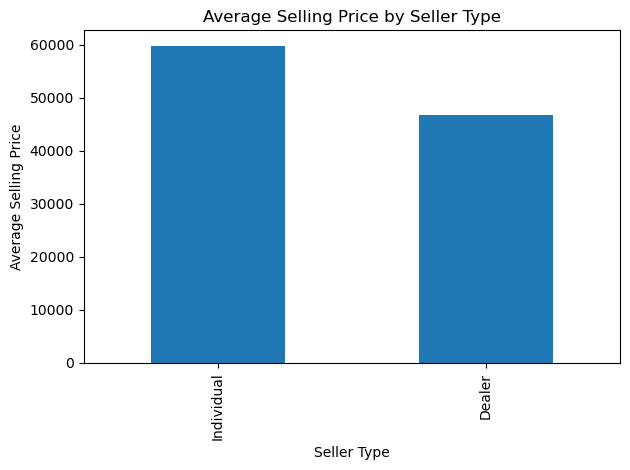

In [18]:
seller_col = 'seller_type' if 'seller_type' in df.columns else None
if seller_col is not None:
    # ensure numeric price
    df['selling_price_num'] = pd.to_numeric(df['selling_price'], errors='coerce')
    avg_price_by_seller = df.groupby(seller_col, dropna=False)['selling_price_num'].mean().sort_values(ascending=False)
    display(avg_price_by_seller.to_frame("avg_selling_price"))

    plt.figure()
    avg_price_by_seller.plot(kind='bar')
    plt.title("Average Selling Price by Seller Type")
    plt.xlabel("Seller Type")
    plt.ylabel("Average Selling Price")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'seller_type' not found in the dataset.")

<h2 style="font-size:28px;">Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
</h2>

,avg_km_driven
owner,
4th owner,311500.000000
2nd owner,39288.991870
3rd owner,33292.181818
1st owner,32816.583333


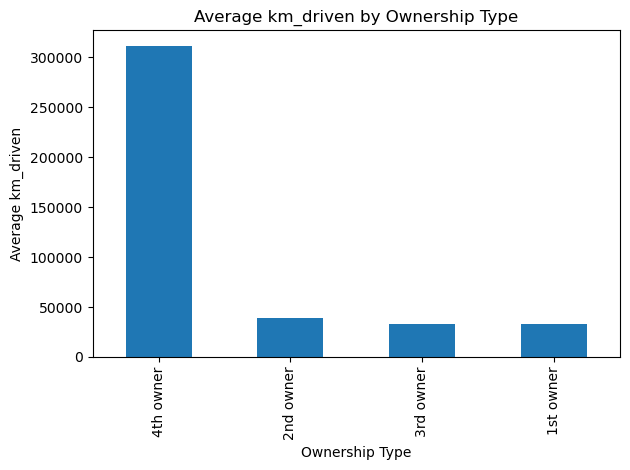

In [19]:
owner_col_candidates = [c for c in df.columns if c.lower() in ['owner', 'ownership', 'ownership_type']]
owner_col = owner_col_candidates[0] if owner_col_candidates else None

df['km_driven_num'] = pd.to_numeric(df.get('km_driven'), errors='coerce')

if owner_col is not None:
    avg_km_by_owner = df.groupby(owner_col, dropna=False)['km_driven_num'].mean().sort_values(ascending=False)
    display(avg_km_by_owner.to_frame("avg_km_driven"))

    plt.figure()
    avg_km_by_owner.plot(kind='bar')
    plt.title("Average km_driven by Ownership Type")
    plt.xlabel("Ownership Type")
    plt.ylabel("Average km_driven")
    plt.tight_layout()
    plt.show()
else:
    print("Ownership column not found (tried: 'owner', 'ownership', 'ownership_type').")

<h2 style="font-size:28px;">Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
</h2>

In [20]:
km = df['km_driven_num']
before_summary = km.describe()
print("Before removing outliers:")
display(before_summary)

Q1, Q3 = km.quantile(0.25), km.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

mask = km.between(lower, upper)
df_iqr = df[mask].copy()
after_summary = df_iqr['km_driven_num'].describe()

print("\nIQR thresholds:")
print("Lower =", lower, "Upper =", upper)
print("\nAfter removing outliers:")
display(after_summary)
print(f"Rows kept: {mask.sum()} / {len(df)}")

Before removing outliers:


count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven_num, dtype: float64


IQR thresholds:
Lower = -30750.0 Upper = 87250.0

After removing outliers:


count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven_num, dtype: float64

Rows kept: 1022 / 1061


<h2 style="font-size:28px;">Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
</h2>

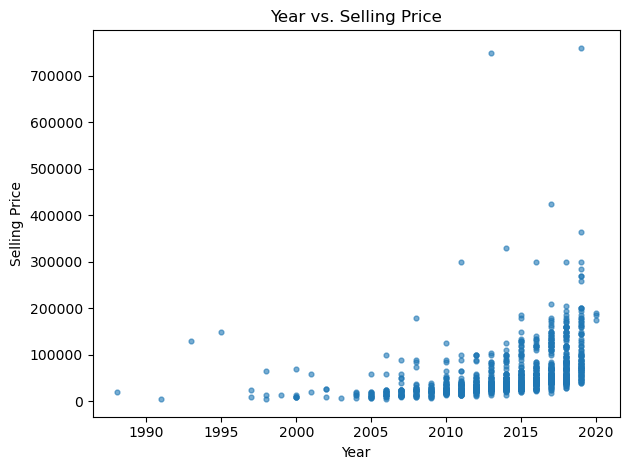

Correlation (year, selling_price): 0.40218840061476036


In [21]:
df['year_num'] = pd.to_numeric(df.get('year'), errors='coerce')
df['selling_price_num'] = pd.to_numeric(df.get('selling_price'), errors='coerce')

plt.figure()
plt.scatter(df['year_num'], df['selling_price_num'], s=12, alpha=0.6)
plt.title("Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.tight_layout()
plt.show()

corr_year_sp = df[['year_num','selling_price_num']].dropna().corr().iloc[0,1]
print("Correlation (year, selling_price):", corr_year_sp)

<h2 style="font-size:28px;">Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.</h2>

In [22]:
if 'seller_type' in df.columns:
    df_ohe = pd.get_dummies(df, columns=['seller_type'], drop_first=False, dtype=int)
    display(df_ohe.head())
else:
    print("Column 'seller_type' not found; cannot perform one-hot encoding.")

,name,selling_price,year,owner,km_driven,ex_showroom_price,selling_price_num,km_driven_num,year_num,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,175000,350,2019,0,1
1,Honda Dio,45000,2017,1st owner,5650,NaN,45000,5650,2017,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,150000,12000,2018,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,65000,23000,2015,0,1
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,20000,21000,2011,0,1


<h2 style="font-size:28px;">Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
</h2>

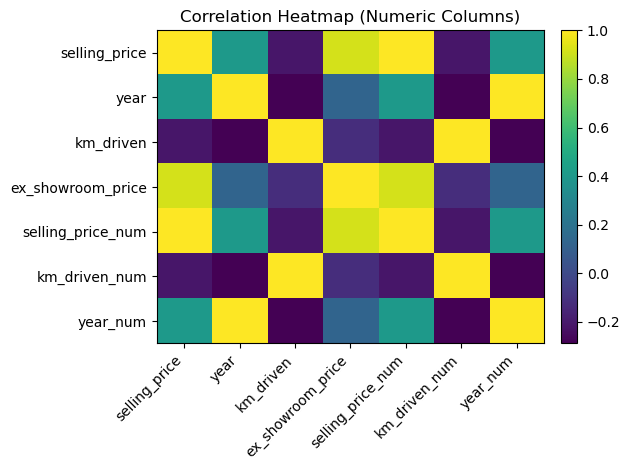

,,abs_correlation
selling_price,selling_price_num,1.000000
year,year_num,1.000000
km_driven_num,km_driven,1.000000
selling_price_num,selling_price,1.000000
km_driven,km_driven_num,1.000000
year_num,year,1.000000
ex_showroom_price,selling_price,0.918583
selling_price,ex_showroom_price,0.918583
selling_price_num,ex_showroom_price,0.918583
ex_showroom_price,selling_price_num,0.918583


In [23]:
numeric_df = df.select_dtypes(include=[np.number]).apply(pd.to_numeric, errors='coerce')
corr = numeric_df.corr()

plt.figure()
im = plt.imshow(corr, aspect='auto')
plt.title("Correlation Heatmap (Numeric Columns)")
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(corr.index)), labels=corr.index)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

corr_unstack = corr.abs().where(~np.eye(corr.shape[0], dtype=bool))
top_pairs = corr_unstack.unstack().dropna().sort_values(ascending=False).head(10)
display(top_pairs.to_frame("abs_correlation"))

<h2 style="font-size:28px;">Question 10: Summarize your findings in a brief report:</h2>

1* Key price drivers (indicative): Newer model year, lower kilometers, higher engine/power ratings (if present), and seller type.
2* Data cleaning performed: Type coercion for numeric fields; missing value inspection; IQR-based outlier removal example for km_driven.
3* Feature engineering ideas: One-hot encode categoricals (e.g., seller_type), binning, scaling; interaction terms.
4* Next steps: Fit baseline regression (Linear Regression/Random Forest) and evaluate MAE/RMSE.